In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
   # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения



# 1. Чтение и подготовка данных


In [2]:
url = "https://raw.githubusercontent.com/Sermjazhko/ML/master/filmtv_movies.csv"
data = pd.read_csv(url)


Убираем ненужные символы в данных и ненужные столбцы. Добавляем столбец, который определяет кассовые сборы. 

In [3]:

data.drop(['filmtv_id'], axis=1, inplace = True)

data["boolHumor"] = np.where(data["humor"] >= 2.0, 1, 0) 

In [4]:
data.shape

(37711, 19)

Преобразуем к категориальным признакам

In [5]:
data['actors'] = data['actors'].astype('category')
data['directors'] = data['directors'].astype('category')
data['country'] = data['country'].astype('category')
data['genre'] = data['genre'].astype('category')

In [6]:
data.isna()
data.isna().sum()

title               0
year                0
genre              88
duration            0
country             9
directors          29
actors           1868
avg_vote            0
critics_vote     4085
public_vote       219
total_votes         0
description      1391
notes           19606
humor               0
rhythm              0
effort              0
tension             0
erotism             0
boolHumor           0
dtype: int64

In [7]:
data['genre'].fillna(data['genre'].mode().iloc[0], inplace=True)
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)
data['directors'].fillna(data['directors'].mode().iloc[0], inplace=True)
data['actors'].fillna(data['actors'].mode().iloc[0], inplace=True)

In [8]:
data.isna().sum()

title               0
year                0
genre               0
duration            0
country             0
directors           0
actors              0
avg_vote            0
critics_vote     4085
public_vote       219
total_votes         0
description      1391
notes           19606
humor               0
rhythm              0
effort              0
tension             0
erotism             0
boolHumor           0
dtype: int64

In [9]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data['description'].fillna('No description, no photo, no nothing at all!', inplace=True)
data['notes'].fillna('No description, no photo, no nothing at all!', inplace=True)

In [10]:
data.isna().sum()

title           0
year            0
genre           0
duration        0
country         0
directors       0
actors          0
avg_vote        0
critics_vote    0
public_vote     0
total_votes     0
description     0
notes           0
humor           0
rhythm          0
effort          0
tension         0
erotism         0
boolHumor       0
dtype: int64

In [11]:
data.head()

,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism,boolHumor
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",Attori non professionisti,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0,1
1,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0,0
2,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0,0
3,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2,1
4,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0,1


In [12]:
data['actors'] = pd.factorize(data['actors'])[0]
data['directors'] = pd.factorize(data['directors'])[0]
data['country'] = pd.factorize(data['country'])[0]
data['genre'] = pd.factorize(data['genre'])[0]

In [13]:
data.drop(['title', 'description', 'notes', 'directors', 'actors'], axis=1, inplace = True)

In [14]:
# нормализация
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data.describe()

,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,boolHumor
count,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000
mean,1992.236244,4.913580,100.644666,80.690382,5.840516,5.855366,5.963777,35.462968,0.597544,1.422052,0.702395,0.962557,0.301000,0.170640
std,23.404296,4.572401,27.061535,259.965632,1.412866,1.516289,1.486530,65.872978,0.897430,1.120866,1.109600,1.085195,0.614126,0.376199
min,1897.000000,0.000000,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,1.000000,90.000000,0.000000,4.900000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,3.000000,96.000000,1.000000,6.000000,6.000000,6.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,2012.000000,7.000000,107.000000,15.000000,6.900000,7.000000,7.000000,34.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
max,2021.000000,26.000000,1525.000000,1872.000000,10.000000,10.000000,10.000000,1010.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000


# 2. Разбиваем данные на обучающую и тестовую выборки

In [16]:
data.columns

Index(['year', 'genre', 'duration', 'country', 'avg_vote', 'critics_vote',
       'public_vote', 'total_votes', 'humor', 'rhythm', 'effort', 'tension',
       'erotism', 'boolHumor'],
      dtype='object')

In [17]:
X = data_stand.drop(['humor',  'boolHumor'], axis=1)
y = data['humor']

In [18]:
X.head()

,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,rhythm,effort,tension,erotism
0,-0.437366,-1.074617,-0.910690,-0.310389,1.316108,1.414397,0.697075,-0.219558,1.407793,-0.633016,-0.886990,-0.490127
1,-0.052821,-0.855913,-0.097728,-0.306542,0.466770,0.095387,0.697075,-0.477631,0.515626,-0.633016,0.955996,-0.490127
2,-0.693729,-0.637210,-0.356398,-0.310389,-0.170233,0.095387,-0.648340,-0.401727,0.515626,0.268210,-0.886990,-0.490127
3,-0.437366,-0.418507,-0.208586,-0.310389,0.820661,1.414397,0.024367,-0.265101,0.515626,-0.633016,0.034503,2.766534
4,-2.146454,-0.418507,-0.578115,-0.306542,0.042102,-0.346481,0.697075,-0.325824,-0.376541,0.268210,-0.886990,-0.490127


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

N_train, N_test

(25266, 12445)

Подбор гиперпараметров

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

Подбор нейронов в однослойной сети. 

In [21]:
hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [16:54<00:00, 20.28s/it]


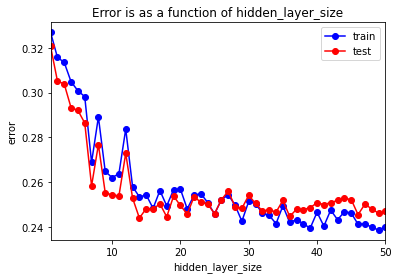

In [22]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

In [23]:

print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: Min error=0.2387002295575081, number of neurons=49
Test: Min error=0.24403374849337084, number of neurons=14


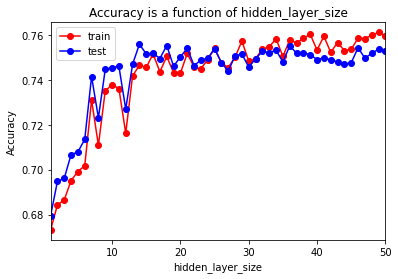

In [24]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

Train: max accuracy=0.7612997704424919, number of neurons=49
Test: max accuracy=0.7559662515066292, number of neurons=14


Подборка количества нейронов для двуслойной сети

In [26]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [47:40, 286.08s/it]


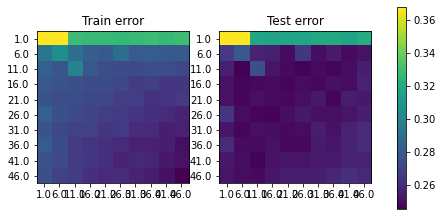

In [27]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

In [28]:
print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: error={0}, number of neurons={1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("Train: error={0}, number of neurons={1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Train: Min error=0.20612681073379244, number of neurons=45,45
Test: error=0.2593009240658899, number of neurons=45,45

Test: Min error=0.2454801124949779, number of neurons=10,5
Train: error=0.2522362067600728, number of neurons=10,5



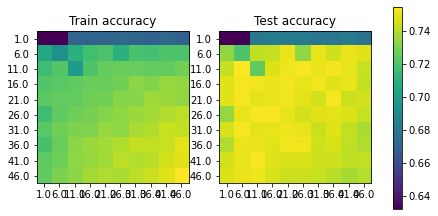

In [29]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

In [30]:
print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: accuracy={0}, number of neurons={1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("Train: accuracy={0}, number of neurons={1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

Train: Max accuracy=0.7938731892662075, number of neurons=45,45
Test: accuracy=0.7406990759341101, number of neurons=45,45

Test: Max accuracy=0.7545198875050221, number of neurons=10,5
Train: accuracy=0.7477637932399271, number of neurons=10,5



Лучшие показатели подемонстрировала сеть из 2-ух слоев (точность на тестовой и обучающей выборке у неё немного выше). Самая оптимальная точность достигается при количесте нейронов (45,45). Будем подбирать параметры alpha для сети из 2-ух слоёв.

In [31]:
alpha_arr = np.logspace(-3, 2, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(30,40),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [16:35<00:00, 19.90s/it]


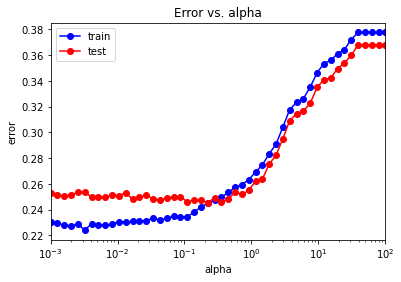

In [32]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

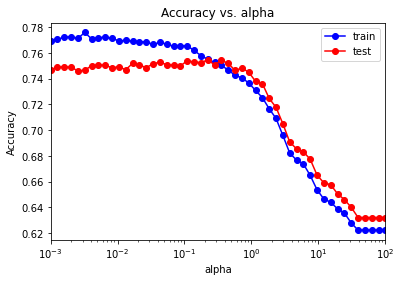

In [33]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [34]:
alpha_arr2 = np.logspace(-3, 2, 50)
test_err2 = []
train_err2 = []
train_acc2 = []
test_acc2 = []

for alpha in tqdm(alpha_arr2):
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(10,),
                              solver='adam', activation='relu', max_iter=1000, random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err2.append(np.mean(y_train != y_train_pred))
    test_err2.append(np.mean(y_test != y_test_pred))
    train_acc2.append(accuracy_score(y_train, y_train_pred))
    test_acc2.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [08:19<00:00,  9.99s/it]


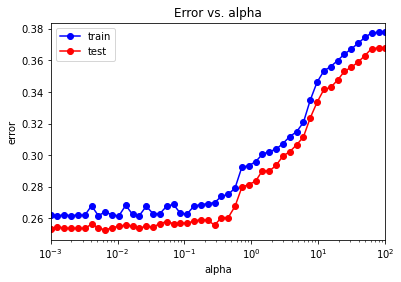

In [36]:
plt.semilogx(alpha_arr2, train_err2, 'b-o', label = 'train')
plt.semilogx(alpha_arr2, test_err2, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr2), np.max(alpha_arr2)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

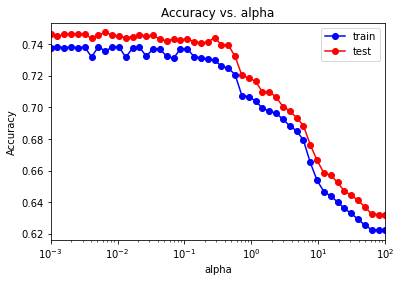

In [37]:
plt.semilogx(alpha_arr2, train_acc2, 'b-o', label = 'train')
plt.semilogx(alpha_arr2, test_acc2, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr2), np.max(alpha_arr2)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [42]:
alpha_opt = 2
print("Alpha o:", alpha_opt)

Alpha o: 2


Классификатор при найденном alpha.

In [43]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(20,),
                          solver='adam', activation='relu', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)


Матрица рассогласования.

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[7329 1275  500   87    5    0]
 [ 438  964  492  139   20    0]
 [  98  254  504  231   37    0]
 [   2   10    9   30   20    1]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]


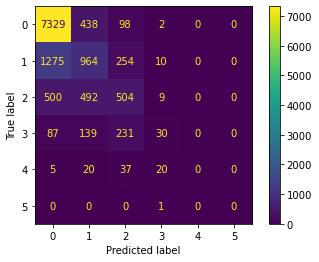

In [45]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test) 
plt.show()

# Выводы

1. Подбор числа нейронов в однослойной модели
1) Почти одинаковое распределение тренировочных и тестовых данных.
2) Наблюдается переобучение. 
3) При количестве нейровнов в слое больше 2 уже достигается точность выше 75%. Это говорит о том, что все входные объекты могут быть спроецированы в двумерное пространство и разделены на классы с высокой точностью 75%.

2. Подбор числа нейронов в двуслойной модели
1) Наблюдается недообучение тренировочной выборки.

3. Подбор параметра регуляризации
С ростом коэффициента регуляризации растёт ошибка и снижается точность. Это говорит о том, что после обучения у модели не возникает больших значений весовых коэффициентов, а значит нет переобучения. При alpha > 10e-1 начинается рост ошибки и снижение точности, то есть с ростом alpha веса модели уменьшаются и стремятся к нулю. 